In [115]:
# Carga el dataset California Housing y realiza:
# a) Un modelo de regresión lineal general de la mediana de los valores de las casas (variable respuesta) con todas las variables numéricas del
# dataset.
# b) La librería Scikit-Learn no proporciona los p.valores o intervalos de confianza para los coeficientes del modelo. Obtén estos valores mediante
# la librería statsmodels. ¿Qué variables son estadísticamente significativas en el modelo de regresión general? Representa los valores predichos por 
# el modelo frente a los reales. ¿Ajusta bien el modelo?
# c) ¿Cuál sería la predicción de un barrio donde todas sus variables numéricas estuvieran en el valor de su mediana y su variable categórica tuviera
# el valor de la moda?

In [101]:
# Apartado a)

import pandas as pd

# Comenzamos cargando el dataset
housing = pd.read_csv('datasets/housing/housing.csv')

print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [103]:
# Se separa la variable respuesta de las variables predictoras
respuesta = housing['median_house_value']
housing = housing.drop('median_house_value', axis=1) # Se elimina del dataframe la columna (axis=1) correspondiente a la variable respuesta
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB
None


In [105]:
# La variable numérica 'total_bedrooms' no contiene todos los datos. Los datos faltantes se imputan por el valor de la mediana de dicha variable.
# Para realizar la imputación se carga la clase SimpleImputer
from sklearn.impute import SimpleImputer

imputador = SimpleImputer(strategy='median')

# Para que la imputación no de error se elimina la variable categórica (no numérica)
housing_num = housing.drop('ocean_proximity', axis=1)

# Imputación
imputador.fit(housing_num)
housing_num_imp = imputador.transform(housing_num) # El método transform devuelve un array de arrays en lugar de un dataframe
nombre_columnas = housing_num.columns
dic = {nombre_columnas[i]:housing_num_imp.transpose()[i] for i in range(len(nombre_columnas))} # Diccionario auxiliar 
housing_imp = pd.DataFrame(dic) # Se construye el dataset imputado a partir del diccionario auxiliar
print(housing_imp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [107]:
# Se estandarizan las variables predictoras para hacerlas del mismo orden de magnitud. La estandarización debe ir siempre después de la imputación.
# La clase Pipeline del módulo sklearn.pipelearn se encarga de realizar la imputación y la estandarización en el orden correcto, por lo que la
# imputación anterior nos la podríamos haber ahorrado. Aún así se requiere importar SimpleImputer y desechar la variable categórica.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputador', SimpleImputer(strategy='median')),
    ('std_scalrer', StandardScaler())
                        ])

# Se aplica el pipeline
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [113]:
from sklearn.linear_model import LinearRegression # Para el ajuste

lm1 = LinearRegression()
lm1.fit(housing_num_tr, respuesta) # Se ajustan las variables predictoras para predecir la variable respuesta

# Coeficientes del modelo. Como las variables predictoras se han estandarizado, los coeficientes son del mismo orden de magnitud.
print('Ordenada en el origen:', lm1.intercept_)
print('Componentes del vector normal del hiperplano;', lm1.coef_)

Ordenada en el origen: 206855.8169089139
Componentes del vector normal del hiperplano; [-85369.22518    -90723.40175504  14403.20315262 -14443.94445799
  34037.42560482 -45153.79498679  30319.8204304   75520.30834439]


In [123]:
# Apartado b)
import statsmodels.api as sm
from scipy import stats

X = housing_num_tr
y = respuesta
X2 = sm.add_constant(X) # Se añade el parámetro correspondiente a la ordenada en el origen
est = sm.OLS(y,X2) # Se vuelve a construir el modelo empleando la librería statsmodels.api
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4498.
Date:                Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:11:57   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    484.967    426.536      0.0

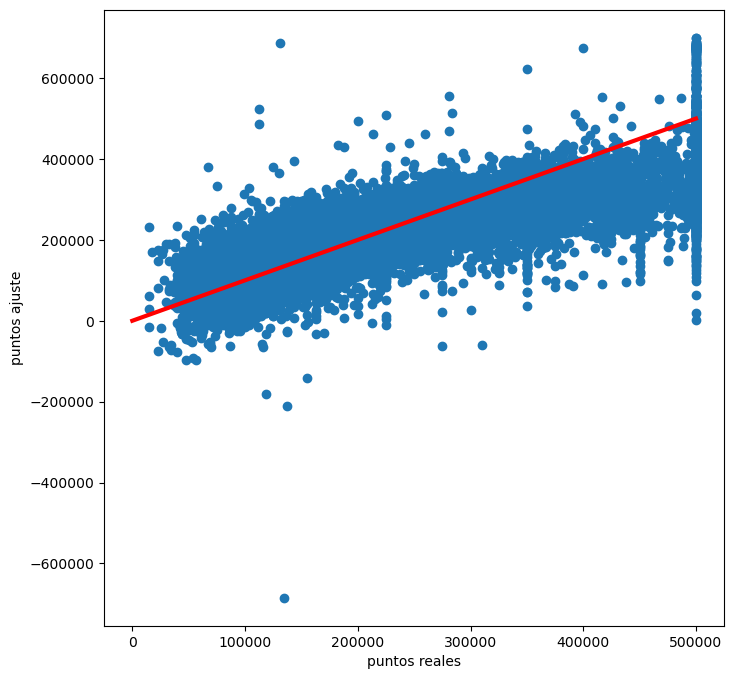

In [129]:
# Todas las variables predictoras son estadísticamente significativas porque el correspondiente p-valor es inferior a 0.05. También se puede
# comprobar consultando el intervalo de confianza; ninguno contiene el cero.
# Los coeficientes de determinación y de determinación ajustado son práticamente inguales porque el número de observaciones es mucho mayor que el
# número de variables.
# Nótese que el valor de los parámetros es igual a aquellos que se obtuvieron en el apartado anterior empleando la función LinearRegression.
# A continuación, se representan los valores predichos frente a los reales.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
y_pred = lm1.predict(housing_num_tr)
plt.scatter(y,y_pred)
plt.xlabel('puntos reales')
plt.ylabel('puntos ajuste')
plt.plot([0, max(y)],[0, max(y)],color='red',linewidth=3)
plt.show()

In [137]:
# Apartado c)
# Obtenemos las medianas de las variables numéricas
import numpy as np
medianas = np.median(housing_num_tr, axis=0)
print(medianas)

[ 0.53891366 -0.6422871   0.02864572 -0.23321042 -0.24283094 -0.22913175
 -0.23681619 -0.17679508]


In [143]:
x_nueva = np.array(medianas)
x_nueva = x_nueva.reshape(1,-1)
y_nueva = lm1.predict(x_nueva)
print('El valor predicho es:', y_nueva, 'dólares.')

El valor predicho es: [204449.69888918] dólares.
